In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from keras.utils import to_categorical
from random import sample
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [63]:
df = pd.read_csv(r"C:\Users\hp\Desktop\OSS COMP'\train.csv")

In [37]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cat


ModuleNotFoundError: No module named 'xgboost'

In [64]:
df.shape

(54697, 8)

In [65]:
df=df.drop(['ID'],axis=1)


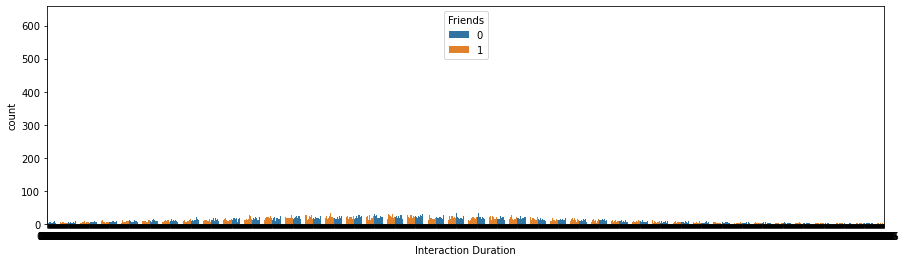

In [8]:
plt.figure(figsize=(15, 4))
sns.countplot(df['Interaction Duration'], hue=df['Friends'])
plt.show()

In [66]:
dataset=df.values

In [67]:
X = dataset[:,0:5]
Y = dataset[:,5]
print(X)

[['Alika' 'Alfie' 3.8765595024166366 13.035114607973386 'Class']
 ['Pennie' 'Lolita' 2.8362177437185987 5.811428567374143 'At Work']
 ['Crissy' 'Carree' 3.006119478961901 4.882863040283199 'Over a Meal']
 ...
 ['Crissy' 'Darcie' 1.9732623958018936 2.8246984773129875 'At Work']
 ['Dixie' 'Alix' 0.3353271100862881 1.738562395611871 'In Passing']
 ['Vania' 'Maddalena' 1.4918638336504702 0.2489336448808732 'Class']]


In [81]:
df['Moon Phase During Interaction']= to_categorical(df['Moon Phase During Interaction'])
df['Person A']= to_categorical(df['Person A'])
df['Person B']= to_categorical(df['Person B'])
df['Interaction Type']= to_categorical(df['Interaction Type'])


MemoryError: Unable to allocate 11.1 GiB for an array with shape (54697, 54697) and data type float32

In [44]:
encoder = LabelEncoder()
encoder.fit(Y)
df['Friends'] = encoder.transform(Y)



In [68]:
print(df['Friends'])

0        1
1        0
2        0
3        0
4        1
        ..
54692    1
54693    0
54694    0
54695    0
54696    0
Name: Friends, Length: 54697, dtype: int64


In [69]:
encoder.fit(dataset[:,3])
df['Moon Phase During Interaction'] = encoder.transform(dataset[:,3])
encoder.fit(dataset[:,0])
df['Person A']=encoder.transform(dataset[:,0])
encoder.fit(dataset[:,1])
df['Person B']=encoder.transform(dataset[:,1])

In [70]:
encoder = LabelEncoder()
encoder.fit(dataset[:,3])
df['Interaction Type'] = encoder.transform(dataset[:,3])

In [71]:
df.columns.tolist()

['Person A',
 'Person B',
 'Years of Knowing',
 'Interaction Duration',
 'Interaction Type',
 'Moon Phase During Interaction',
 'Friends']

In [72]:
train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])



# Separate target and predictors
y_train = train[ 'Friends']
x_train = train.drop([ 'Friends'], axis=1)
y_test = test[ 'Friends']
x_test = test.drop([ 'Friends'], axis=1)
y_validate = validate[ 'Friends']
x_validate = validate.drop([ 'Friends'], axis=1)

# Check the balance of the splits on y_

In [73]:
print (train.shape, test.shape, validate.shape)

(32818, 7) (10939, 7) (10940, 7)


In [74]:
y_train.mean()


0.48701931866658543

In [75]:
y_test.mean()

0.4801170125239967

In [76]:
df.tail(2)

,Person A,Person B,Years of Knowing,Interaction Duration,Interaction Type,Moon Phase During Interaction,Friends
54695,27,5,0.335327,1.738562,3975,3975,0
54696,91,65,1.491864,0.248934,465,465,0


In [25]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print ("Features sorted by their score:")


Features sorted by their score:


In [92]:
bayes_model = GaussianNB()
# Fit the model
bayes_model.fit(x_train, y_train)
# Accuracy
bayes_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(bayes_model.predict(x_test))
probs = pd.DataFrame(bayes_model.predict_proba(x_test))

# Store metrics
bayes_accuracy = metrics.accuracy_score(y_test, predicted)     
bayes_roc_auc = metrics.roc_auc_score(y_test, probs[1])       
bayes_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
bayes_classification_report = metrics.classification_report(y_test, predicted)
bayes_precision = metrics.precision_score(y_test, predicted, pos_label=1)
bayes_recall = metrics.recall_score(y_test, predicted, pos_label=1)
bayes_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
bayes_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_test, y_test, scoring='precision', cv=10)
bayes_cv_mean = np.mean(bayes_cv_scores)

In [93]:
# Instantiate with a max depth of 3
tree_model = tree.DecisionTreeClassifier(max_depth=3) 
# Fit a decision tree
tree_model = tree_model.fit(x_train, y_train)
# Training accuracy
tree_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(tree_model.predict(x_test))
probs = pd.DataFrame(tree_model.predict_proba(x_test))

# Store metrics
tree_accuracy = metrics.accuracy_score(y_test, predicted)     
tree_roc_auc = metrics.roc_auc_score(y_test, probs[1])       
tree_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
tree_classification_report = metrics.classification_report(y_test, predicted)
tree_precision = metrics.precision_score(y_test, predicted, pos_label=1)
tree_recall = metrics.recall_score(y_test, predicted, pos_label=1)
tree_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# evaluate the model using 10-fold cross-validation
tree_cv_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), x_test, y_test, scoring='precision', cv=10)

# output decision plot
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                     feature_names=x_test.columns.tolist(),
                     class_names=['remain', 'left'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graph_from_dot_data(dot_data)


In [94]:
logit_model = LogisticRegression()
# Fit
logit_model = logit_model.fit(x_train, y_train)
# How accurate?
logit_model.score(x_train, y_train)
#0.7874

# How does it perform on the test dataset?

# Predictions on the test dataset
predicted = pd.DataFrame(logit_model.predict(x_test))
# Probabilities on the test dataset
probs = pd.DataFrame(logit_model.predict_proba(x_test))
print (metrics.accuracy_score(y_test, predicted))


0.9052015723557912


E:\ANKIT\CONDA\envs\tensorflow_gpuenv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [95]:
# instantiate learning model (k = 3)
knn_model = KNeighborsClassifier(n_neighbors=3)
# fit the model
knn_model.fit(x_train, y_train)
# Accuracy
knn_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(knn_model.predict(x_test))
probs = pd.DataFrame(knn_model.predict_proba(x_test))

# Store metrics
knn_accuracy = metrics.accuracy_score(y_test, predicted)     
knn_roc_auc = metrics.roc_auc_score(y_test, probs[1])       
knn_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
knn_classification_report = metrics.classification_report(y_test, predicted)
knn_precision = metrics.precision_score(y_test, predicted, pos_label=1)
knn_recall = metrics.recall_score(y_test, predicted, pos_label=1)
knn_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
knn_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_test, y_test, scoring='precision', cv=10)
knn_cv_mean = np.mean(knn_cv_scores)

In [96]:
# Instantiate
svm_model = SVC(probability=True)
# Fit
svm_model = svm_model.fit(x_train, y_train)
# Accuracy
svm_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(svm_model.predict(x_test))
probs = pd.DataFrame(svm_model.predict_proba(x_test))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)     
svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])       
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
svm_classification_report = metrics.classification_report(y_test, predicted)
svm_precision = metrics.precision_score(y_test, predicted, pos_label=1)
svm_recall = metrics.recall_score(y_test, predicted, pos_label=1)
svm_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
svm_cv_scores = cross_val_score(SVC(probability=True), x_test, y_test, scoring='precision', cv=10)
svm_cv_mean = np.mean(svm_cv_scores)

In [77]:
# Instantiate

rf = RandomForestClassifier()	   
# Fit

rf_model = rf.fit(x_train, y_train)
# training accuracy 99.74%
rf_model.score(x_train, y_train)



# Predictions/probs on the test dataset
predicted = pd.DataFrame(rf_model.predict(x_test))
probs = pd.DataFrame(rf_model.predict_proba(x_test))

# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)     
rf_roc_auc = metrics.roc_auc_score(y_test, probs[1])       
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
rf_classification_report = metrics.classification_report(y_test, predicted)
rf_precision = metrics.precision_score(y_test, predicted, pos_label=1)
rf_recall = metrics.recall_score(y_test, predicted, pos_label=1)
rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
rf_cv_scores = cross_val_score(RandomForestClassifier(), x_test, y_test, scoring='precision', cv=10)
rf_cv_mean = np.mean(rf_cv_scores)


In [61]:
print (rf_cv_mean)

0.515257174243293


In [97]:
logit_accuracy = metrics.accuracy_score(y_test, predicted)     
logit_roc_auc = metrics.roc_auc_score(y_test, probs[1])       
logit_confus_matrix = metrics.confusion_matrix(y_test, predicted) 
logit_classification_report = metrics.classification_report(y_test, predicted)
logit_precision = metrics.precision_score(y_test, predicted, pos_label=1)
logit_recall = metrics.recall_score(y_test, predicted, pos_label=1)
logit_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

In [98]:
logit_cv_scores = cross_val_score(LogisticRegression(), x_test, y_test, scoring='precision', cv=10)
logit_cv_mean = np.mean(rf_cv_scores)

E:\ANKIT\CONDA\envs\tensorflow_gpuenv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\ANKIT\CONDA\envs\tensorflow_gpuenv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

In [99]:
models = pd.DataFrame({
  'Model': ['Logistic', 'd.Tree', 'r.f.',  'kNN',  'Bayes'],
  'Accuracy' : [logit_accuracy, tree_accuracy, rf_accuracy,  knn_accuracy, bayes_accuracy],
  'Precision': [logit_precision, tree_precision, rf_precision, knn_precision, bayes_precision],
  'recall' : [logit_recall, tree_recall, rf_recall,  knn_recall, bayes_recall],
  'F1' : [logit_f1, tree_f1, rf_f1,  knn_f1, bayes_f1],
  'cv_precision' : [logit_cv_mean, "tree_cv_mean", rf_cv_mean,  knn_cv_mean, bayes_cv_mean]
})

In [100]:
models.sort_values(by='Precision', ascending=False)

,Model,Accuracy,Precision,recall,F1,cv_precision
1,d.Tree,0.889752,0.961872,0.802171,0.874792,tree_cv_mean
2,r.f.,0.911235,0.903335,0.912795,0.908041,0.908517
4,Bayes,0.899168,0.893419,0.896992,0.895202,0.854324
0,Logistic,0.873663,0.861953,0.877380,0.869598,0.908517
3,kNN,0.851449,0.841847,0.850343,0.846074,0.854324


In [101]:
print (rf_accuracy)

0.9112350306243715


In [102]:
print (svm_accuracy)

0.8736630404973033


In [103]:
print(knn_accuracy)

0.851448944144803


In [104]:
print (bayes_accuracy)

0.8991681140872109


In [105]:
print (logit_accuracy)

0.8736630404973033


In [49]:
logit_accuracy=metrics.accuracy_score(y_test, predicted) 

In [42]:
print (logit_accuracy)

0.8021757016180638


In [108]:
new=pd.read_csv(r"C:\Users\hp\Desktop\OSS COMP'\test.csv")

In [109]:
new1=new.drop(['ID'],axis=1)


In [110]:
nd=new1.values
print (nd)

[['Janaya' 'Nicolina' 5.662542415701619 14.863449366112892 'Social_Media'
  'New_Moon']
 ['Nina' 'Rachelle' 2.68594230558302 3.002965733733333 'Class'
  'Waxing_Cresent']
 ['Deborah' 'Veda' 4.702475921904114 13.453554357842195 'Social_Media'
  'Waxing_Gibbous']
 ...
 ['Marcy' 'Marlane' 4.917892865943394 14.508902133786394 'At Work'
  'New_Moon']
 ['Carolyne' 'Cherianne' 0.6207348142223066 5.747633793345122 'At Work'
  'Third_Quarter']
 ['Shirl' 'Dorothy' 5.463051948171636 6.588532943895481 'In Passing'
  'Third_Quarter']]


In [111]:
encoder = LabelEncoder()
encoder.fit(nd[:,3])
new1['Interaction Type'] = encoder.transform(nd[:,3])
encoder.fit(nd[:,5])
new1['Moon Phase During Interaction'] = encoder.transform(nd[:,5])
encoder.fit(nd[:,0])
new1['Person A'] = encoder.transform(nd[:,0])
encoder.fit(nd[:,1])
new1['Person B'] = encoder.transform(nd[:,1])





In [112]:
new1.head(2)

,Person A,Person B,Years of Knowing,Interaction Duration,Interaction Type,Moon Phase During Interaction
0,46,70,5.662542,14.863449,41688,2
1,77,75,2.685942,3.002966,7804,6


In [113]:
y=logit_model.predict(new1)

In [114]:
print (y)

[1 1 1 ... 1 1 1]


In [115]:
new = new[['ID']]

In [116]:
new.head(2)

,ID
0,1
1,2


In [117]:
new.insert(1,'friends',y)

In [118]:
new.head(2)

,ID,friends
0,1,1
1,2,1


In [119]:
new.to_csv(r"C:\Users\hp\Desktop\OSS COMP'\logit_result5.csv",index='false')